In [7]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

| Column       | Description                                                                                                                 | Example (Row 0) |
| ------------ | --------------------------------------------------------------------------------------------------------------------------- | --------------- |
| **age**      | Age of the patient (in years)                                                                                               | 70              |
| **sex**      | Sex of the patient: `1` = male, `0` = female                                                                                | 1               |
| **cp**       | Chest pain type:<br>• `0` = typical angina<br>• `1` = atypical angina<br>• `2` = non-anginal pain<br>• `3` = asymptomatic   | 3               |
| **trestbps** | Resting blood pressure (in mm Hg)                                                                                           | 130             |
| **chol**     | Serum cholesterol (in mg/dL)                                                                                                | 322             |
| **fbs**      | Fasting blood sugar > 120 mg/dL: `1` = true, `0` = false                                                                    | 0               |
| **restecg**  | Resting electrocardiographic results:<br>• `0` = normal<br>• `1` = ST-T abnormality<br>• `2` = left ventricular hypertrophy | 2               |
| **thalach**  | Maximum heart rate achieved                                                                                                 | 109             |
| **exang**    | Exercise-induced angina: `1` = yes, `0` = no                                                                                | 0               |
| **oldpeak**  | ST depression induced by exercise relative to rest                                                                          | 2.4             |
| **slope**    | Slope of the peak exercise ST segment:<br>• `0` = upsloping<br>• `1` = flat<br>• `2` = downsloping                          | 1               |
| **ca**       | Number of major vessels (0–3) colored by fluoroscopy                                                                        | 3               |
| **thal**     | Thalassemia:<br>• `1` = normal<br>• `2` = fixed defect<br>• `3` = reversible defect                                         | 1               |
| **target**   | Diagnosis of heart disease:<br>• `1` = has heart disease<br>• `0` = no heart disease                                        | 1               |


In [8]:
df_statlog=pd.read_csv('capstone datasets/Heart Disease Statlog/Heart_disease_statlog.csv')

In [9]:
df_statlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [10]:
df_statlog.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [11]:
df_statlog.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [12]:
X=df_statlog.drop(labels='target',axis=1)
y=df_statlog['target']

#### Forward Selection

Features: ['age']
Coefficients: [0.01160379]
Intercept: -0.18718834424268527
R-squared: 0.04508071128076241
RMSE: 0.4855744437514223
----------------------------------------
Features: ['age', 'sex']
Coefficients: [0.01325793 0.34091294]
Intercept: -0.5082918454853735
R-squared: 0.146962664693281
RMSE: 0.458940630740915
----------------------------------------
Features: ['age', 'sex', 'cp']
Coefficients: [0.01111871 0.32272413 0.20288753]
Intercept: -0.8206114946641987
R-squared: 0.295192655358094
RMSE: 0.41716484133955173
----------------------------------------
Features: ['age', 'sex', 'cp', 'trestbps']
Coefficients: [0.00889026 0.32808836 0.2082046  0.00411029]
Intercept: -1.2543686863861547
R-squared: 0.3151879137874334
RMSE: 0.41120482001443376
----------------------------------------
Features: ['age', 'sex', 'cp', 'trestbps', 'chol']
Coefficients: [0.00807604 0.34593063 0.20402802 0.00379829 0.00088902]
Intercept: -1.394034574490094
R-squared: 0.32284727411758096
RMSE: 0.408898769

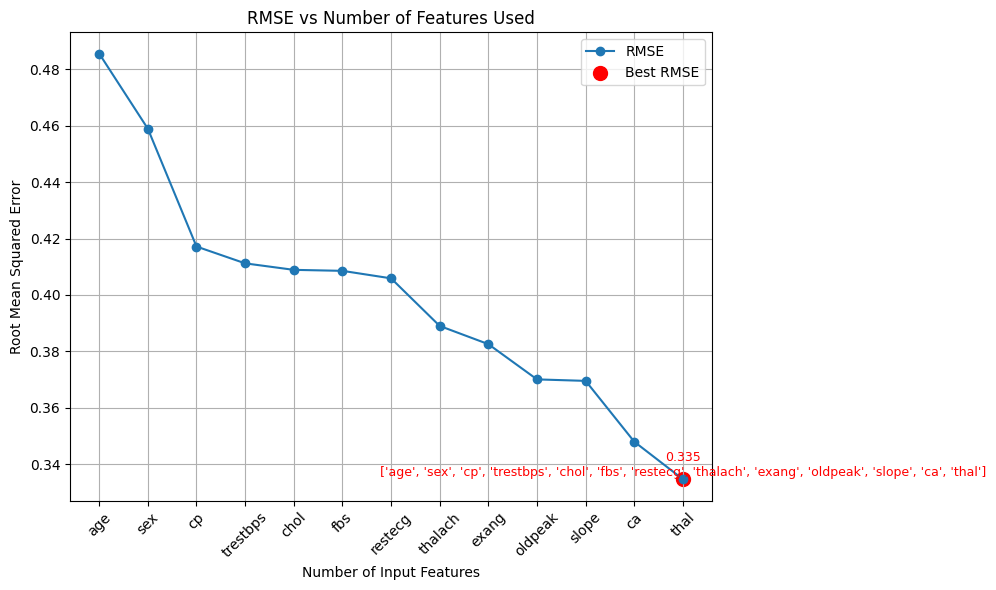

In [ ]:
# Initialize lists to store input features, RMSE values, and feature combinations
input_features = []
rmse_values = []
feature_combinations = []

best_rmse = float('inf')
best_features = []

for i in df_statlog.columns:
    if i != 'target':
        input_features.append(i)
        model = LinearRegression()
        model.fit(X[input_features], y)
        
        predictions = model.predict(X[input_features])
        rmse = np.sqrt(np.mean((predictions - y) ** 2))
        rmse_values.append(rmse)
        feature_combinations.append(list(input_features))  # store a copy of current combination
        
        print(f"Features: {input_features}")
        print("Coefficients:", model.coef_)
        print("Intercept:", model.intercept_)
        print("R-squared:", model.score(X[input_features], y))
        print("RMSE:", rmse)
        print('-' * 40)
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_features = list(input_features)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rmse_values) + 1), rmse_values, marker='o', label='RMSE')

# Highlight best RMSE point
best_index = rmse_values.index(best_rmse)
print(best_index)
plt.scatter(best_index + 1, best_rmse, color='red', s=100, label='Best RMSE')
plt.text(best_index + 1, best_rmse, f"{best_rmse:.3f}\n{best_features}", 
         ha='center', va='bottom', fontsize=9, color='red')

plt.title('RMSE vs Number of Features Used')
plt.xlabel('Number of Input Features')
plt.ylabel('Root Mean Squared Error')
plt.xticks(ticks=range(1, len(input_features) + 1), labels=input_features, rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Backward selection

In [ ]:
input_features=X.columns.tolist()
rmse_values = []
feature_combinations = []
best_rmse = float('inf')
best_features = []  

for i in range(1, len(input_features) + 1):
    

#### Principal Component Regression 

#### Partial Least Square Regression